### Applied Data Science Capstone
#### Project : Location Analysis for a New Bar Business in Boston
#### James Maxwell

In [32]:
# import the required libraries

# pandas and numpy
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import requests

print('Libraries imported.')

Libraries imported.


In [33]:
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Boston, MA'

geolocator = Nominatim(user_agent="Toronto")
location = geolocator.geocode(address)
latitude_boston = location.latitude
longitude_boston = location.longitude
print('The geograpical coordinate of Boston are {}, {}.'.format(latitude_boston, longitude_boston))

The geograpical coordinate of Boston are 42.3602534, -71.0582912.


In [34]:
# get the boston neighborhood data
#!wget -q -O 'Boston_neighborhood_coordinates.csv'  http://cocl.us/Geospatial_data
boston_df = pd.read_csv('Boston_neighborhood_coordinates.csv')  

In [35]:
boston_df.head()

,Neighborhood,Latitude,Longitude
0,Roslindale,42.2832,-71.1270
1,Jamaica Plain,42.3097,-71.1151
2,Mission Hill,42.3296,-71.1062
3,Longwood,42.3358,-71.1077
4,Bay Village,42.3490,-71.0698


In [36]:
boston_df

,Neighborhood,Latitude,Longitude
0,Roslindale,42.2832,-71.1270
1,Jamaica Plain,42.3097,-71.1151
2,Mission Hill,42.3296,-71.1062
3,Longwood,42.3358,-71.1077
4,Bay Village,42.3490,-71.0698
5,Leather District,42.3505,-71.0579
6,Chinatown,42.3501,-71.0624
7,North End,42.3647,-71.0542
8,Roxbury,42.3152,-71.0914
9,South End,42.3388,-71.0765


In [37]:
boston_df.shape

(26, 3)

set up the required libraries to enable mapping and clustering for Toronto

In [38]:
map_boston = folium.Map(location=[latitude_boston, longitude_boston], zoom_start=10)

# add markers to map
for lat, lng, Neighborhood in zip(boston_df['Latitude'], boston_df['Longitude'], boston_df['Neighborhood']):
    label = '{}'.format(Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_boston)  
    
map_boston

set up Foursquare credentials and version

In [39]:
CLIENT_ID = 'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'your-client-secret' # your Foursquare Secret

CLIENT_ID = 'YG1125ZEVUF00UK3U5FDDUCED53B0ZFA5I2SBYDTLRURXYN5' # your Foursquare ID

CLIENT_SECRET = '4CHRAMZ0LV2JIT0DHZ2PMVPIGD4NPJRSKGSE52AJAV2BTLZ0' # your Foursquare Secret

VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YG1125ZEVUF00UK3U5FDDUCED53B0ZFA5I2SBYDTLRURXYN5
CLIENT_SECRET:4CHRAMZ0LV2JIT0DHZ2PMVPIGD4NPJRSKGSE52AJAV2BTLZ0


In [40]:
# define search radius and limit of venue count to retreve
radius=500
LIMIT=100

Explore neighborhoods in Boston while querying existing venues for 'bar' and 'pub'.

Create a function to repeat the same process to all the neighborhoods in Boston

In [41]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    query='bar,pub'
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            query,
            radius,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [42]:
boston_bar_venues = getNearbyVenues(names=boston_df['Neighborhood'],
                                   latitudes=boston_df['Latitude'],
                                   longitudes=boston_df['Longitude']
                                  )

Roslindale
Jamaica Plain
Mission Hill
Longwood
Bay Village
Leather District
Chinatown
North End
Roxbury
South End
Back Bay
East Boston
Charlestown
West End
Beacon Hill
Downtown
Fenway-Kenmore
Brighton
West Roxbury
Hyde Park
Mattapan
Dorchester
South Boston Waterfront
South Boston
Allston
Harbor Islands


In [43]:
boston_bar_venues.shape

(371, 7)

In [44]:
 boston_bar_venues.groupby('Neighborhood').count()
# 22 from 26 neighborhoods are represented

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allston,21,21,21,21,21,21
Back Bay,24,24,24,24,24,24
Bay Village,30,30,30,30,30,30
Beacon Hill,11,11,11,11,11,11
Charlestown,1,1,1,1,1,1
Chinatown,29,29,29,29,29,29
Downtown,61,61,61,61,61,61
East Boston,3,3,3,3,3,3
Fenway-Kenmore,20,20,20,20,20,20


In [45]:
#dump the categories for inspection
boston_bar_venues.to_csv('Boston_neighborhood_venues1.csv')  

In [46]:
# look at first 20 rows
boston_bar_venues.head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Roslindale,42.2832,-71.1270,Napper Tandy's,42.287242,-71.127455,Pub
1,Roslindale,42.2832,-71.1270,BK's Pub,42.285167,-71.129425,Bar
2,Roslindale,42.2832,-71.1270,The Square Root,42.286605,-71.130762,Coffee Shop
3,Roslindale,42.2832,-71.1270,Turtle Swamp Bierhalle,42.286178,-71.128042,Beer Garden
4,Jamaica Plain,42.3097,-71.1151,The Galway House,42.311456,-71.114398,Pub
5,Jamaica Plain,42.3097,-71.1151,Costello's Tavern,42.311208,-71.114704,Bar
6,Mission Hill,42.3296,-71.1062,TGI Fridays,42.333519,-71.104694,Bar
7,Mission Hill,42.3296,-71.1062,Mission Bar & Grill,42.333925,-71.105127,Bar
8,Longwood,42.3358,-71.1077,Flann O'Brien's,42.333781,-71.103243,Pub
9,Longwood,42.3358,-71.1077,Puddingstone Tavern,42.333625,-71.103162,Bar


In [47]:
boston_bar_venues['Venue Category'].value_counts()

Bar                        171
Pub                         31
Hotel Bar                   23
Cocktail Bar                18
Sports Bar                  18
Wine Bar                    13
Italian Restaurant          11
Beer Garden                  9
Restaurant                   9
Dive Bar                     9
Karaoke Bar                  8
American Restaurant          7
Gay Bar                      6
Coffee Shop                  4
Hookah Bar                   4
New American Restaurant      4
Sushi Restaurant             3
Whisky Bar                   3
Steakhouse                   2
Speakeasy                    2
Beer Bar                     2
Gastropub                    2
Lounge                       2
Rock Club                    1
Tapas Restaurant             1
Sake Bar                     1
Boat or Ferry                1
Cycle Studio                 1
Bed & Breakfast              1
Wine Shop                    1
Café                         1
Seafood Restaurant           1
Irish Pu

In [48]:
print('There are {} uniques categories.'.format(len(boston_bar_venues['Venue Category'].unique())))

There are 33 uniques categories.


In [49]:
# delete some irrelavant categories

boston_bar_venues.drop(boston_bar_venues[ (boston_bar_venues['Venue Category'] == 'Cycle Studio') ].index , inplace=True)
boston_bar_venues.drop(boston_bar_venues[ (boston_bar_venues['Venue Category'] == 'Bed & Breakfast') ].index , inplace=True)
boston_bar_venues.drop(boston_bar_venues[ (boston_bar_venues['Venue Category'] == 'Wine Shop') ].index , inplace=True)
boston_bar_venues.drop(boston_bar_venues[ (boston_bar_venues['Venue Category'] == 'Seafood Restaurant') ].index , inplace=True)
boston_bar_venues.drop(boston_bar_venues[ (boston_bar_venues['Venue Category'] == 'Café') ].index , inplace=True)
boston_bar_venues.drop(boston_bar_venues[ (boston_bar_venues['Venue Category'] == 'Tapas Restaurant') ].index , inplace=True)
boston_bar_venues.drop(boston_bar_venues[ (boston_bar_venues['Venue Category'] == 'Boat or Ferry') ].index , inplace=True)
boston_bar_venues.drop(boston_bar_venues[ (boston_bar_venues['Venue Category'] == 'Italian Restaurant') ].index , inplace=True)
boston_bar_venues.drop(boston_bar_venues[ (boston_bar_venues['Venue Category'] == 'Hookah Bar') ].index , inplace=True)
boston_bar_venues.drop(boston_bar_venues[ (boston_bar_venues['Venue Category'] == 'Boat or Ferry') ].index , inplace=True)
boston_bar_venues.drop(boston_bar_venues[ (boston_bar_venues['Venue Category'] == 'Sushi Restaurant') ].index , inplace=True)
boston_bar_venues.shape

(346, 7)

In [50]:
boston_bar_venues['Venue Category'].value_counts()

Bar                        171
Pub                         31
Hotel Bar                   23
Sports Bar                  18
Cocktail Bar                18
Wine Bar                    13
Beer Garden                  9
Restaurant                   9
Dive Bar                     9
Karaoke Bar                  8
American Restaurant          7
Gay Bar                      6
New American Restaurant      4
Coffee Shop                  4
Whisky Bar                   3
Speakeasy                    2
Beer Bar                     2
Steakhouse                   2
Gastropub                    2
Lounge                       2
Rock Club                    1
Sake Bar                     1
Irish Pub                    1
Name: Venue Category, dtype: int64

In [51]:
# chose not to further refine
# boston_bar_venues = boston_venues[boston_venues['Venue Category'].str.contains('Bar') | boston_venues['Venue Category'].str.contains('Pub')]

In [52]:
# boston_bar_venues.shape

In [53]:
#boston_bar_venues.head(50)

In [54]:
boston_bar_venues_count_by_neighborhood = boston_bar_venues.groupby(['Neighborhood'])[["Venue Category"]].count()
# 22 from 26 neighborhoods are represented - where are the others ??

boston_bar_venues_count_by_neighborhood.rename({'Venue Category': 'Venue_count'}, axis=1, inplace=True)

#reset the index to allow for join later on with cluster
boston_bar_venues_count_by_neighborhood.reset_index(level=0, inplace=True)

listOfSeries = [pd.Series(['Brighton', 0] ) ,
                pd.Series(['Dorchester', 0] ) ,
                pd.Series(['Mattapan', 0] ),
                pd.Series(['Roxbury', 0] ),
               ]

#listOfSeries = [pd.Series(['Brighton', 0], index=dfObj.columns ) ,
#                pd.Series(['Dorchester', 0], index=dfObj.columns ) ,
#                pd.Series(['Mattapan', 0], index=dfObj.columns ),
#                pd.Series(['Roxbury', 0], index=dfObj.columns )]


# Pass a list of series to the append() to add multiple rows
#boston_bar_venues_count_by_neighborhoods = boston_bar_venues_count_by_neighborhood.append(listOfSeries , ignore_index=True)

#boston_bar_venues_count_by_neighborhoods = boston_bar_venues_count_by_neighborhoods.append({'Neighborhood' : 'Brighton' , 'Venue_count' : 0} , ignore_index=True)

#boston_bar_venues_count_by_neighborhoods = boston_bar_venues_count_by_neighborhoods.append(pd.Series(['Neighborhood', 0] ), ignore_index=True)


add_extra_rows = pd.DataFrame({"Neighborhood":['Brighton', 'Dorchester', 'Mattapan', 'Roxbury'], 
                               "Venue_count":[0, 0, 0, 0],
                               }) 

boston_bar_venues_count_by_neighborhood = boston_bar_venues_count_by_neighborhood.append(add_extra_rows, ignore_index = True)

boston_bar_venues_count_by_neighborhood

,Neighborhood,Venue_count
0,Allston,19
1,Back Bay,21
2,Bay Village,30
3,Beacon Hill,10
4,Charlestown,1
5,Chinatown,28
6,Downtown,57
7,East Boston,3
8,Fenway-Kenmore,19
9,Harbor Islands,64


In [55]:
boston_bar_venues_count_by_neighborhood

,Neighborhood,Venue_count
0,Allston,19
1,Back Bay,21
2,Bay Village,30
3,Beacon Hill,10
4,Charlestown,1
5,Chinatown,28
6,Downtown,57
7,East Boston,3
8,Fenway-Kenmore,19
9,Harbor Islands,64


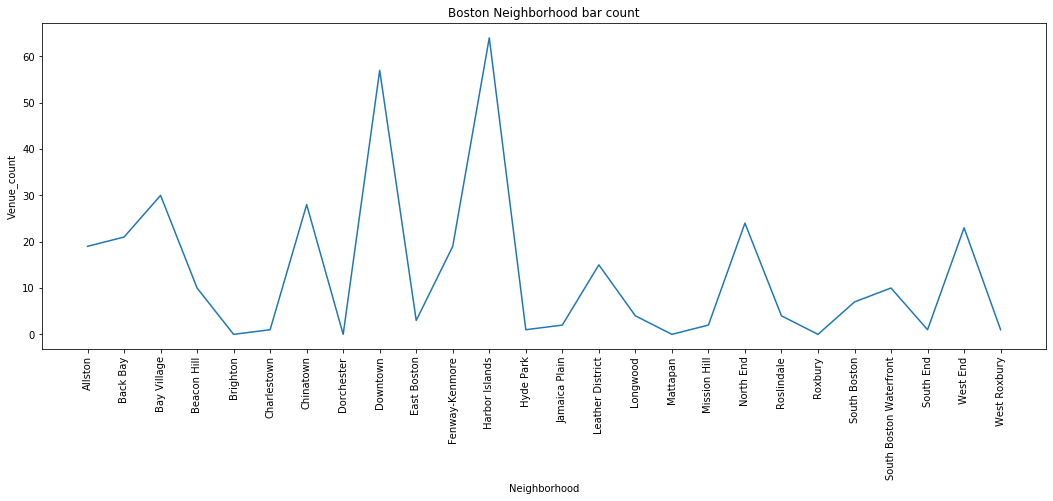

In [56]:
plt.figure(figsize=(18, 6))

ax = sns.lineplot(x="Neighborhood",
                         y="Venue_count",
                         
                         data=boston_bar_venues_count_by_neighborhood
                         ).set_title('Boston Neighborhood bar count')
plt.xticks(rotation=90)
plt.show();



In [57]:
# why are the disparity in the numbers ?
# are there restaurants around that serve the purpose ?

Analyzing each neighborhood

In [58]:
# one hot encoding
boston_onehot = pd.get_dummies(boston_bar_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
boston_onehot['Neighborhood'] = boston_bar_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [boston_onehot.columns[-1]] + list(boston_onehot.columns[:-1])
boston_onehot.head()

,American Restaurant,Bar,Beer Bar,Beer Garden,Cocktail Bar,Coffee Shop,Dive Bar,Gastropub,Gay Bar,Hotel Bar,...,Pub,Restaurant,Rock Club,Sake Bar,Speakeasy,Sports Bar,Steakhouse,Whisky Bar,Wine Bar,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Roslindale
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Roslindale
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Roslindale
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Roslindale
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Jamaica Plain


In [59]:
boston_onehot.shape

(346, 24)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [60]:
boston_grouped = boston_onehot.groupby('Neighborhood').mean().reset_index()
boston_grouped

,Neighborhood,American Restaurant,Bar,Beer Bar,Beer Garden,Cocktail Bar,Coffee Shop,Dive Bar,Gastropub,Gay Bar,...,New American Restaurant,Pub,Restaurant,Rock Club,Sake Bar,Speakeasy,Sports Bar,Steakhouse,Whisky Bar,Wine Bar
0,Allston,0.000000,0.631579,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.052632,0.052632,0.000000,0.052632,0.000000,0.000000,0.000000
1,Back Bay,0.000000,0.571429,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,...,0.047619,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619
2,Bay Village,0.033333,0.400000,0.000000,0.000000,0.133333,0.000000,0.033333,0.000000,0.066667,...,0.000000,0.066667,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.033333
3,Beacon Hill,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,...,0.000000,0.200000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
4,Charlestown,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Chinatown,0.000000,0.321429,0.000000,0.000000,0.071429,0.035714,0.035714,0.000000,0.035714,...,0.000000,0.035714,0.071429,0.000000,0.000000,0.000000,0.000000,0.035714,0.035714,0.035714
6,Downtown,0.017544,0.456140,0.017544,0.052632,0.122807,0.000000,0.035088,0.017544,0.017544,...,0.035088,0.070175,0.052632,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.070175
7,East Boston,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
8,Fenway-Kenmore,0.105263,0.368421,0.000000,0.052632,0.000000,0.000000,0.000000,0.052632,0.105263,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.263158,0.000000,0.000000,0.052632
9,Harbor Islands,0.015625,0.593750,0.015625,0.062500,0.031250,0.000000,0.015625,0.000000,0.000000,...,0.000000,0.125000,0.031250,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.015625


Print each neighborhood along with the top 5 most common venues

In [61]:
num_top_venues = 5

for hood in boston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = boston_grouped[boston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allston----
         venue  freq
0          Bar  0.63
1  Karaoke Bar  0.11
2     Dive Bar  0.11
3   Sports Bar  0.05
4     Sake Bar  0.05


----Back Bay----
         venue  freq
0          Bar  0.57
1    Hotel Bar  0.14
2          Pub  0.10
3     Wine Bar  0.05
4  Coffee Shop  0.05


----Bay Village----
          venue  freq
0           Bar  0.40
1     Hotel Bar  0.13
2  Cocktail Bar  0.13
3           Pub  0.07
4       Gay Bar  0.07


----Beacon Hill----
                 venue  freq
0            Hotel Bar   0.4
1                  Pub   0.2
2  American Restaurant   0.1
3            Speakeasy   0.1
4             Dive Bar   0.1


----Charlestown----
                 venue  freq
0         Cocktail Bar   1.0
1  American Restaurant   0.0
2               Lounge   0.0
3           Whisky Bar   0.0
4           Steakhouse   0.0


----Chinatown----
          venue  freq
0           Bar  0.32
1     Hotel Bar  0.18
2   Karaoke Bar  0.11
3  Cocktail Bar  0.07
4    Restaurant  0.07


----Downtown-

#### put the result above into a *pandas* dataframe and display the top 5 venues for each neighborhood.

In [62]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [63]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boston_grouped['Neighborhood']

for ind in np.arange(boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allston,Bar,Karaoke Bar,Dive Bar,Sports Bar,Sake Bar
1,Back Bay,Bar,Hotel Bar,Pub,Wine Bar,Coffee Shop
2,Bay Village,Bar,Cocktail Bar,Hotel Bar,Pub,Gay Bar
3,Beacon Hill,Hotel Bar,Pub,American Restaurant,Bar,Speakeasy
4,Charlestown,Cocktail Bar,Wine Bar,Irish Pub,Bar,Beer Bar


In [64]:
#### Cluster neighborhoods - run K-means with k = 5 to cluster the neighborhoods into 5 clusters

In [65]:
# set number of clusters
kclusters = 4

boston_grouped_clustering = boston_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 
# to change use .astype()

array([0, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2],
      dtype=int32)

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [66]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

In [67]:
boston_merged = boston_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
boston_merged = boston_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

boston_merged

,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Roslindale,42.2832,-71.1270,1.0,Bar,Beer Garden,Coffee Shop,Pub,Wine Bar
1,Jamaica Plain,42.3097,-71.1151,1.0,Bar,Pub,Wine Bar,Irish Pub,Beer Bar
2,Mission Hill,42.3296,-71.1062,0.0,Bar,Wine Bar,Irish Pub,Beer Bar,Beer Garden
3,Longwood,42.3358,-71.1077,0.0,Bar,Pub,Wine Bar,Irish Pub,Beer Bar
4,Bay Village,42.3490,-71.0698,1.0,Bar,Cocktail Bar,Hotel Bar,Pub,Gay Bar
5,Leather District,42.3505,-71.0579,1.0,Wine Bar,Bar,Restaurant,Karaoke Bar,Hotel Bar
6,Chinatown,42.3501,-71.0624,1.0,Bar,Hotel Bar,Karaoke Bar,Cocktail Bar,Restaurant
7,North End,42.3647,-71.0542,0.0,Bar,Pub,Sports Bar,Dive Bar,Wine Bar
8,Roxbury,42.3152,-71.0914,NaN,NaN,NaN,NaN,NaN,NaN
9,South End,42.3388,-71.0765,0.0,Bar,Wine Bar,Irish Pub,Beer Bar,Beer Garden


In [68]:
# not all neighborhoods were classified (=NaN) because these had no venues and I am giving these a cluster number of 4
boston_merged['Cluster_Labels'] = boston_merged['Cluster_Labels'].fillna(4.0)

In [69]:
boston_merged

,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Roslindale,42.2832,-71.1270,1.0,Bar,Beer Garden,Coffee Shop,Pub,Wine Bar
1,Jamaica Plain,42.3097,-71.1151,1.0,Bar,Pub,Wine Bar,Irish Pub,Beer Bar
2,Mission Hill,42.3296,-71.1062,0.0,Bar,Wine Bar,Irish Pub,Beer Bar,Beer Garden
3,Longwood,42.3358,-71.1077,0.0,Bar,Pub,Wine Bar,Irish Pub,Beer Bar
4,Bay Village,42.3490,-71.0698,1.0,Bar,Cocktail Bar,Hotel Bar,Pub,Gay Bar
5,Leather District,42.3505,-71.0579,1.0,Wine Bar,Bar,Restaurant,Karaoke Bar,Hotel Bar
6,Chinatown,42.3501,-71.0624,1.0,Bar,Hotel Bar,Karaoke Bar,Cocktail Bar,Restaurant
7,North End,42.3647,-71.0542,0.0,Bar,Pub,Sports Bar,Dive Bar,Wine Bar
8,Roxbury,42.3152,-71.0914,4.0,NaN,NaN,NaN,NaN,NaN
9,South End,42.3388,-71.0765,0.0,Bar,Wine Bar,Irish Pub,Beer Bar,Beer Garden


#### Map the 5 clusters

In [70]:
boston_merged['Cluster_Labels'] = boston_merged.Cluster_Labels.astype(int)

In [71]:
# create map
map_clusters = folium.Map(location=[latitude_boston, longitude_boston], zoom_start=11)

#because i added another cluster type 4 i have to modify the kclusters variable to be kclusters+1 below

# set color scheme for the clusters
x = np.arange(kclusters+1)
ys = [i + x + (i*x)**2 for i in range(kclusters+1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boston_merged['Latitude'], boston_merged['Longitude'], boston_merged['Neighborhood'], boston_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine the clusters 1 - 5

Cluster 1

In [139]:
boston_merged.loc[boston_merged['Cluster_Labels'] == 0, boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Mission Hill,Bar,Wine Bar,Irish Pub,Beer Bar,Beer Garden
3,Longwood,Bar,Pub,Wine Bar,Irish Pub,Beer Bar
7,North End,Bar,Pub,Sports Bar,Dive Bar,Wine Bar
9,South End,Bar,Wine Bar,Irish Pub,Beer Bar,Beer Garden
19,Hyde Park,Bar,Wine Bar,Irish Pub,Beer Bar,Beer Garden
22,South Boston Waterfront,Bar,Cocktail Bar,New American Restaurant,Wine Bar,Irish Pub
23,South Boston,Bar,Sports Bar,Wine Bar,Irish Pub,Beer Bar
24,Allston,Bar,Karaoke Bar,Dive Bar,Sports Bar,Sake Bar
25,Harbor Islands,Bar,Pub,Beer Garden,Hotel Bar,Sports Bar


Cluster 2

In [140]:
boston_merged.loc[boston_merged['Cluster_Labels'] == 1, boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Roslindale,Bar,Beer Garden,Coffee Shop,Pub,Wine Bar
1,Jamaica Plain,Bar,Pub,Wine Bar,Irish Pub,Beer Bar
4,Bay Village,Bar,Cocktail Bar,Hotel Bar,Pub,Gay Bar
5,Leather District,Wine Bar,Bar,Restaurant,Karaoke Bar,Hotel Bar
6,Chinatown,Bar,Hotel Bar,Karaoke Bar,Cocktail Bar,Restaurant
10,Back Bay,Bar,Hotel Bar,Pub,Wine Bar,Coffee Shop
11,East Boston,Bar,Pub,Whisky Bar,Wine Bar,Hotel Bar
13,West End,Bar,Sports Bar,Hotel Bar,Wine Bar,Pub
14,Beacon Hill,Hotel Bar,Pub,American Restaurant,Bar,Speakeasy
15,Downtown,Bar,Cocktail Bar,Wine Bar,Pub,Beer Garden


Cluster 3

In [141]:
boston_merged.loc[boston_merged['Cluster_Labels'] == 2, boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
18,West Roxbury,Pub,Wine Bar,Irish Pub,Bar,Beer Bar


Cluster 4

In [142]:
boston_merged.loc[boston_merged['Cluster_Labels'] == 3, boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
12,Charlestown,Cocktail Bar,Wine Bar,Irish Pub,Bar,Beer Bar


Cluster 5

In [143]:
boston_merged.loc[boston_merged['Cluster_Labels'] == 4, boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Roxbury,NaN,NaN,NaN,NaN,NaN
17,Brighton,NaN,NaN,NaN,NaN,NaN
20,Mattapan,NaN,NaN,NaN,NaN,NaN
21,Dorchester,NaN,NaN,NaN,NaN,NaN


In [144]:
#join neighborhood cluster with neighborhood venue count

new_df = pd.merge(boston_merged,boston_bar_venues_count_by_neighborhood,  on='Neighborhood')
new_df

,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue_count
0,Roslindale,42.2832,-71.1270,1,Bar,Beer Garden,Coffee Shop,Pub,Wine Bar,4
1,Jamaica Plain,42.3097,-71.1151,1,Bar,Pub,Wine Bar,Irish Pub,Beer Bar,2
2,Mission Hill,42.3296,-71.1062,0,Bar,Wine Bar,Irish Pub,Beer Bar,Beer Garden,2
3,Longwood,42.3358,-71.1077,0,Bar,Pub,Wine Bar,Irish Pub,Beer Bar,4
4,Bay Village,42.3490,-71.0698,1,Bar,Cocktail Bar,Hotel Bar,Pub,Gay Bar,30
5,Leather District,42.3505,-71.0579,1,Wine Bar,Bar,Restaurant,Karaoke Bar,Hotel Bar,15
6,Chinatown,42.3501,-71.0624,1,Bar,Hotel Bar,Karaoke Bar,Cocktail Bar,Restaurant,28
7,North End,42.3647,-71.0542,0,Bar,Pub,Sports Bar,Dive Bar,Wine Bar,24
8,Roxbury,42.3152,-71.0914,4,NaN,NaN,NaN,NaN,NaN,0
9,South End,42.3388,-71.0765,0,Bar,Wine Bar,Irish Pub,Beer Bar,Beer Garden,1


''

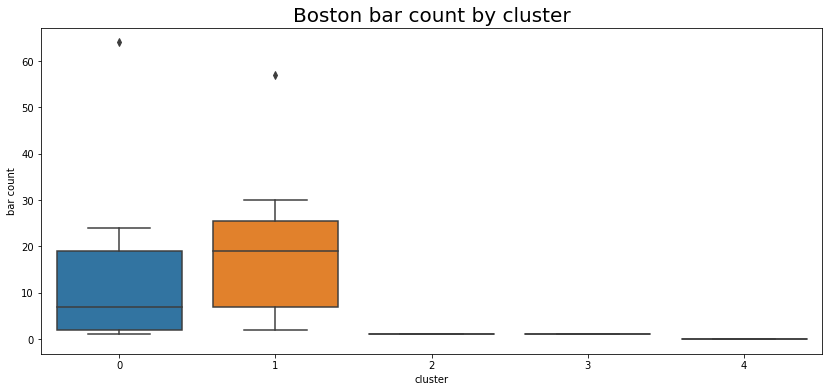

In [157]:
# plot the histogram for interest in new courses
plt.figure(figsize=(14, 6))

ax = sns.boxplot(x="Cluster_Labels", y="Venue_count", data=new_df)
plt.ylabel('bar count')
plt.xlabel('cluster')
plt.title('Boston bar count by cluster', fontsize=20)
;